# Ejercicio 1: Experimento con Luz

## Descripción del Experimento y Notación

Se mide la intensidad de la luz $I_d$ al inicio de la capa de profundidad $d$ de cierta agua. La longitud de cada capa es la misma. La distancia del inicio de la capa $d$ a la superficie, es $d$ veces la longitud de las capas. Y como es usual $\Delta I_d := I_{d+1}-I_d$; y $\hat I_d$ representa una aproximación a $I_d$.

Los resultados del experimento para esta agua son los siguientes.

<AxesSubplot:xlabel='$d$'>

<AxesSubplot:xlabel='$I_d$'>

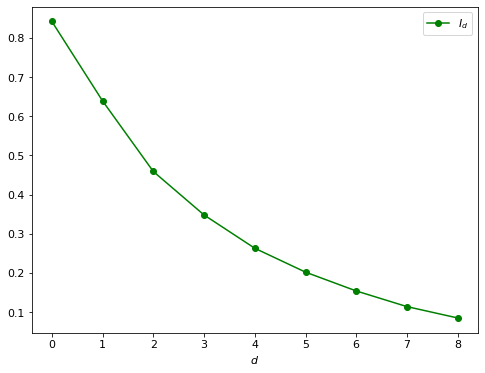

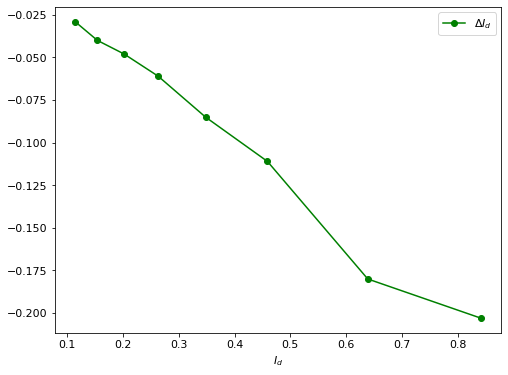

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8,6]
mpl.rcParams['font.size'] = 11
import pandas as pd
pd.set_option('display.precision', 3)
pd.set_option("display.latex.repr", False)

#datos = pd.read_clipboard(header=[0])
agua1 = {'$d$': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
         '$I_d$': {0: 0.842, 1: 0.639, 2: 0.459, 3: 0.348, 4: 0.263, 5: 0.202, 6: 0.154, 7: 0.114, 8: 0.085},
         '$\\Delta I_d$': {0: -0.203, 1: -0.18, 2: -0.111, 3: -0.085, 4: -0.061, 5: -0.048, 6: -0.04, 7: -0.029, 8: None}}
datos = pd.DataFrame(agua1)

display(datos.plot(x="$d$", y="$I_d$", marker="o", color="g"))
display(datos.plot(x="$I_d$", y="$\\Delta I_d$",  marker="o", color="g"))

#print(datos.to_latex(index=False, escape=False))

\begin{tabular}{rrr}
\toprule
 $d$ &  $I_d$ &  $\Delta I_d$ \\
\midrule
   0 &  0.842 &        -0.203 \\
   1 &  0.639 &        -0.180 \\
   2 &  0.459 &        -0.111 \\
   3 &  0.348 &        -0.085 \\
   4 &  0.263 &        -0.061 \\
   5 &  0.202 &        -0.048 \\
   6 &  0.154 &        -0.040 \\
   7 &  0.114 &        -0.029 \\
   8 &  0.085 &           NaN \\
\bottomrule
\end{tabular}

## Ecuación Dinámica y Solución

La segunda gráfica de diferencias contra intensidades sugiere un modelo lineal. Debe de considerarse con cuidado cuál es la ecuación dinámica de estos datos pues los datos del eje $I_d$ han sido re-ordenados. (El punto con $d=0$ en realidad será aquel con mayor $I_d$, pues se observa de los datos que la intensidad disminuye conforme la capa $d$ es más profunda.)

La hipótesis a usar para este modelo es que una fracción $f:1\geq f \geq 0$ de la intensidad de luz se pierde al pasar a la siguiente capa. De manera que la diferencia de intensidad de la luz de una capa a la siguiente está dada por la ecuación dinámica

$$\Delta \hat I_d = -f I_d,$$
que tiene solución

$$\hat I_d = (1-f)^{d}I_0,$$

donde $d$ está extendido del número de capas en enteros no negativos a cualquier valor no negativo.
Se interpretan los valores no enteros de $d$ como la distancia a la superficie en múltiplos del grosor de las capas.

## Ajuste lineal

Se usa una librería de ajuste polinomial y se usa el coeficiente de $x$ del resultado para grado 1 como pendiente para modelar la diferencia de intensidad respecto de la intensidad.

In [62]:
from numpy import polyfit as pf
(m,b) = list(pf(x=datos.iloc[:-1,1].to_numpy(), y=datos.iloc[:-1,2].to_numpy(), deg=1))
(m,b) # m es -f

(-0.2545728251931048, 0.0015080631135462607)

Como hemos dicho al inicio de esta sección en realidad los puntos $(I_d, \Delta I_d)$ cerca de intensidad 0 son datos de las capas más profundas. Si $I_d$ llegase a $0$ en algún $d$, las siguientes $I_{d+k}$ no deberían de poder disminuir a valores negativos. Por lo que el valor de $\Delta I_d$ cuando $I_d=0$ debe de ser $0$, e ignoramos que la regresión lineal nos de una intersección distinta de $(0,0)$.

Tomamos entonces $f=0.2546$, y añadimos las aproximaciones a la tabla de "pandas".

## Comparación de Solución con Datos Observados

In [63]:
ajuste_lineal = lambda x: m*x
solucion = lambda d: (1+m)**d * datos["$I_d$"][0]
datos["$\\hat I_d$"] = datos[["$d$"]].applymap(solucion)
datos["$\\Delta \\hat I_d$"] = datos[["$I_d$"]].applymap(ajuste_lineal)
#print(datos.to_latex(index=False, escape=False))

\begin{tabular}{rrrrr}
\toprule
 $d$ &  $I_d$ &  $\Delta I_d$ &  $\hat I_d$ &  $\Delta \hat I_d$ \\
\midrule
   0 &  0.842 &        -0.203 &       0.842 &             -0.214 \\
   1 &  0.639 &        -0.180 &       0.628 &             -0.163 \\
   2 &  0.459 &        -0.111 &       0.468 &             -0.117 \\
   3 &  0.348 &        -0.085 &       0.349 &             -0.089 \\
   4 &  0.263 &        -0.061 &       0.260 &             -0.067 \\
   5 &  0.202 &        -0.048 &       0.194 &             -0.051 \\
   6 &  0.154 &        -0.040 &       0.144 &             -0.039 \\
   7 &  0.114 &        -0.029 &       0.108 &             -0.029 \\
   8 &  0.085 &           NaN &       0.080 &             -0.022 \\
\bottomrule
\end{tabular}

Se mantiene el color verde para los datos originales, y se usa azúl para la solución del sistema dinámico que aproxima los datos.

<AxesSubplot:title={'center':'Comparación de Diferencias respecto Intensidad en Datos y en la Solución'}, xlabel='$I_d$'>

<AxesSubplot:title={'center':'Comparación de Datos y la Solución'}>

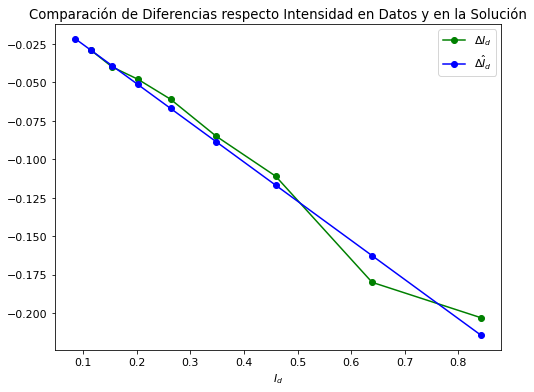

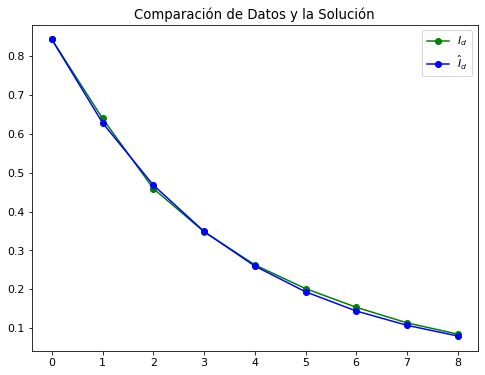

In [64]:
display(datos.plot(x="$I_d$", y=["$\\Delta I_d$","$\\Delta \\hat I_d$"],  marker="o", color=["g","b"],
       title="Comparación de Diferencias respecto Intensidad en Datos y en la Solución"))

display(datos.plot(y=["$I_d$","$\\hat I_d$"],  marker="o", color=["g","b"],
       title="Comparación de Datos y la Solución"))

Podemos observar que nuestra aproximación está un poco por debajo de los datos en los últimos puntos, pero en algunos otros por encima con un pequeño margen.

## Comparación del Agua anterior con el Agua vista en Clase

Llamemosle "Agua #1" al agua a la que le corresponden los datos anteriores de este ejercicio y "Agua #2" al agua con los datos vistos en clase. Para el Agua #2 los datos del experimento nombraremos las intensidades en el grosor $d$ por $I_d$. Donde las capas $d$ son del mismo grosor que en el Agua #1 pero la opacidad podría ser distinta. 

Para determinar que una es más opaca que la otra no es suficiente ver los cambios en las capas correspondientes, pues el cambio es proporcional a la intensidad al inicio de la capa y estas son distintas. Pero con la solución del sistema dinámico para el agua #1 podemos comparar sustituyendo el valor inicial $I'_0$ por $I_0$ en 

$$\hat I_d = (1-f)^{d}I_0.$$

Pues esto aproximaría cuanto sería la intensidad en el agua #1 si se empezara con la misma intensidad de luz en la superficie que en el agua #2. Nombremos $\hat I'_d$ a tales aproximaciones; la intensidad de la luz en la capa $d$ en el agua #1 si la intensidad de luz inicial fuera la misma que en el agua #2.

In [65]:
agua2 = {'$d$': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
         '$I\'_d$': {0: 0.4, 1: 0.33, 2: 0.27, 3: 0.216, 4: 0.17, 5: 0.14, 6: 0.124, 7: 0.098, 8: 0.082, 9: 0.065},
         '$\\Delta I\'_d$': {0: -0.07, 1: -0.06, 2: -0.054, 3: -0.046, 4: -0.03, 5: -0.016, 6: -0.026, 7: -0.016, 8: -0.017, 9: None}}
datos2 = pd.DataFrame(agua2)
datos2 = datos.merge(datos2, how='outer')
datos2["$\hat I\'_d$"] = datos2.iloc[:,[0]].applymap(lambda d: (1+m)**d*datos2.iloc[0,5])
#print(datos2.iloc[:,[5,7]].to_latex(index=False, escape=False)) 

\begin{tabular}{rr}
\toprule
 $I'_d$ &  $\hat I'_d$ \\
\midrule
  0.400 &        0.400 \\
  0.330 &        0.298 \\
  0.270 &        0.222 \\
  0.216 &        0.166 \\
  0.170 &        0.124 \\
  0.140 &        0.092 \\
  0.124 &        0.069 \\
  0.098 &        0.051 \\
  0.082 &        0.038 \\
  0.065 &        0.028 \\
\bottomrule
\end{tabular}

<AxesSubplot:xlabel='$d$'>

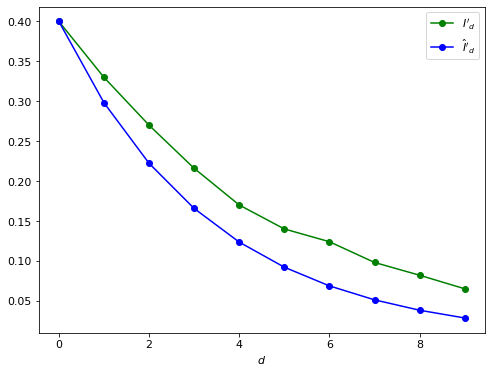

In [66]:
datos2.plot(x="$d$", y=['$I\'_d$','$\hat I\'_d$'], marker="o", color=["g","b"])

Como la estimación es mucho menor usando la fracción del agua #1 para estimar la del agua #2; quiere decir que la fracción de intensidad de luz que pierde el agua #1 es mayor que la que pierde el agua #2. 
Es decir, el agua #1 (de esta tarea) es menos clara que la del agua #2 (que vimos en clase).

# Ejercicio 2: Tiempos de Duplicado y Reducción a la Mitad

Sea $y(t)=A\cdot B^{kt}$ para $A,B,k >0$. El tiempo $t_r$ (si existe) con $r> 0$ para que $y$ alcance $r$ veces su valor partiendo del tiempo $t_0$ inicial está dado por la ecuación

$$A\cdot B^{k(t_r+t_0)} = rA\cdot B^{k t_0},$$
$$ B^{k t_r} = r.$$

Por lo que es independiente del valor de $A$. 
Si $\log$ es el logaritmo natural

$$ B^{k t_r} = \exp(k t_r\log B) =r,$$

entonces si $r > 0$

$$k t_r \log B = \log r,$$
$$t_r = \frac{\log r}{k \log B}.$$

Entonces
$$t_{1/r} = \frac{\log 1/r}{k \log B} = \frac{\log 1-\log r}{k \log B} = -\frac{\log r}{k \log B},$$
$$t_{1/r} = t_{r}.$$

Un $t_r$ negativo interpretado como tiempo es que hace $|t_r|$ de $t_0$ se alcanzó $r$ veces $y(t_0)$.

En particular cuando $B>1$ y $r=2$ se tiene $t_2$ el tiempo de duplicado. Cuando $B<1$ y $r=1/2$ se tiene el tiempo $t_{1/2}$ de reducción a la mitad.

## a) $y = 100 \cdot 0.8^t$

Como $0.8<1$ solo hay tiempo de reducción a la mitad:
$$t_{1/2} = -\frac{\log 2}{\log 0.8}.$$

In [67]:
from math import log,exp
-log(2)/log(0.8)

3.1062837195053903

## b) $y=4\cdot 5^{3t}$

Tiempo de duplicado:
$$t_2= \frac{\log 2}{3\log 5}.$$

In [68]:
log(2)/(3*log(5))

0.14355885269113103

## c) $y=10\cdot 0.8^{2t}$

Tiempo de reducción a la mitad: 
$$t_{1/2} = -\frac{\log 2}{2 \log 0.8}.$$

In [69]:
-log(2)/(2*log(0.8))

1.5531418597526951

## d) $y=0.01^{0.1 t}$

Tiempo de reducción a la mitad:
$$-\frac{\log 2}{0.1 \log 0.01}.$$

In [70]:
-log(2)/(0.1*log(0.01))

1.505149978319906

# Ejercicio 3

Dada una inversión inicial $A_0$ con una tasa de interés compuesta $r$, a los $t$ años se tiene
$$A_t = A_0 (1+r)^t.$$
Las unidades representan dólares.

## a) Encontrar $A_{10}$ si $A_0=1$, $r=0.06$.

$$A_{10} = 1\cdot (1+0.06)^{10} = 1.06^{10}.$$

In [71]:
1.06**10

1.7908476965428546

## b) ¿Para que valor de $r$ se tendría $A_8=2$ si $A_0=1$?

Se busca $r$ tal que
$$2 = (1+r)^8,$$
$$2^{1/8} = 1+r,$$
$$r = 2^{1/8}-1.$$

In [72]:
2**(1/8)-1

0.09050773266525769

## c) Verificar si una inversión se duplica a una tasa de interés de $R\%$ se duplica en $72/R$ años; para $R=4,6,8,9,12$.

Sabemos que el tiempo que buscamos viene de la ecuación $y=A\cdot B^kt$ como en el ejercicio 2; $B=1+R/100$, $k=1$ y la inversión inicial es $A>0$. Y es $t_2=\frac{\log 2}{\log B} = \frac{\log 2}{\log (1+R/100)}$ (sin depender de la inversión inicial mientras no sea 0).

Así que verificamos comprobando contra el valor real.

In [73]:
datos3c = pd.DataFrame(map(lambda R: (R, log(2)/(log(1+R/100)), 72/R), (4,6,8,9,12)),
             columns = ["$R$", "$t_2$", "$72/R$"])
#print(datos3c.to_latex(index=False, escape=False)) 

\begin{tabular}{rrr}
\toprule
 $R$ &  $t_2$ &  $72/R$ \\
\midrule
   4 & 17.673 &    18.0 \\
   6 & 11.896 &    12.0 \\
   8 &  9.006 &     9.0 \\
   9 &  8.043 &     8.0 \\
  12 &  6.116 &     6.0 \\
\bottomrule
\end{tabular}

Se puede ver que la aproximación $72/R$ es bastante cercana al tiempo de duplicado verdadero.

# Ejercicio 4

## a) Una célula de la bacteria dicha tiene masa $2\times 10^{-11}$ gramos. Si en un cultivo de tal bacteria en el tiempo $0$ hay $10^7$ células, ¿cuál es la masa de bacterias en el cultivo en el tiempo $0$?

Como hay $10^7$ células de masa $2\times 10^{-11}$ gramos se tiene una masa de $2\times 10^{7-11} = 2\times 10^{-4}$ gramos de bacterias en el cultivo.

## b) Supongamos que para esta bacteria el tiempo de duplicación es de 30 minutos. ¿Cuánto tiempo en minutos tomaría para que el cultivo del inciso a) llegue a una masa de un gramo?

Sea $t$ el tiempo en intervalos de 30 minutos, es decir $t$ denota el tiempo $t\times 30$ minutos. Sea $M_t$ la masa en el tiempo $t$ en gramos. Tenemos que
$$M_{t+1} = 2 M_t,$$
y para esta ecuación dinámica conocemos que la solución es
$$M_t = 2^t M_0.$$

Recordemos que $M_0=2\times10^{−4}$. Para que $M_t$ sea $1$ gramo,

$$1 = 2^t M_0,$$
$$t = -\frac{\log M_0}{\log 2}.$$

O $t\times 30$ minutos.

In [74]:
(-log(2*10**(-4))/log(2))*30

368.6313713864835

Es decir tomaría $368$ minutos y poco más de medio minuto para llegar a un gramo.

## c)

### ¿Cuántos minutos para que llegue $M_t$ a ser $6\times 10^{27}$ (la masa en gramos de la Tierra)? ¿Cuántas horas?

$t$ debe ser tal que
$$6\times 10^{27} = 2^t M_0,$$
$$t = \frac{\log(6\times 10^{27})-\log M_0}{\log 2}.$$


In [75]:
t = (log(6*10**27)-log(2*10**-4))/log(2)
print("En minutos: ", t*30)
print("En horas: ", t/2)

En minutos:  3136.942003266882
En horas:  52.2823667211147


### ¿Por qué no estámos preocupados por esto en el laboratorio? ¿Por qué no ha sucedido esto ya en la naturaleza?

El modelo dónde las diferencias de densidad relativas a la propia densidad de la población bacteriana crece linealmente, tiene como supuesto que las condiciones son similares en todo el intervalo de tiempo. Una de las condiciones es que la densidad este debajo de cierto nivel para que el metabolismo máximo de las bacterias consuma una cantidad de nutrimentos menor o igual a la que hay en su entorno; por lo tanto se estarían dividiendo a velocidad constante. 

No en todas partes del laboratorio habría suficientes nutrimentos para las bacterias ni mucho menos en toda la superficie de la tierra (que además es solo una fracción de la masa total de la Tierra). Además el modelo no toma en cuenta depredadores o meramente amenazas que corten sus nutrimentos o directamente las maten.

### Explique por qué no es una buena idea extrapolar los resultados mucho más allá del punto final de la recolección de datos.

Porque es desconocido que si hubieramos seguido recolectando datos las condiciones iban a ser las mismas. Y la variación pudo haber sido mayor, descartando que un solo ajuste lineal pueda aproximar bien todos los datos de muestras más grandes. 

Pero incluso en el mejor de los casos: Cuando hay un modelo lineal que mejor aproxima una parte del fenómeno; del cuál se puede obtener un modelo para el fenómeno que nos interesa (Como obtener una solución del sistema dinámico en un modelo de crecimiento.) El error de medición es prácticamente inevitable. Si está dado tal error de medición por la misma variable aleatoria para cada medición, un mejor modelo surge de una muestra más grande en relación con el teorema del límite central. 

Si pensamos en estos modelos lineales como rectas, sabemos que la distancia de rectas no paralelas incrementa conforme se aleja de la intersección de estas. Al aplicar regresión lineal y obtener un vector $x_0$ y una transformación lineal $T$ se tiene una aproximación $Tx+x_0$ que minimiza la distancia a la muestra. Pero conforme crece la norma de $x$ nos alejamos de $x_0$ que es un punto que está cerca de la muestra, es decir nos alejamos de la intersección con el mejor modelo y crecería el error. (Resultado de Espacios Vectoriales Normados de Dimensión Finita.)

# Ejercicio 5: Modelo para el Crecimiento del Moho

El aumento en el área de la colonia de moho durante cualquier intervalo de tiempo es proporcional a la longitud de la circunferencia de la colonia en el punto medio del intervalo de tiempo.

## a) Explique la derivación de la ecuación dinámica

$$A_{t+1}-A_{t-1} = k C_t.$$

Se habla del aumento en el área de la colonia de moho durante cualquier intervalo de tiempo, entonces tomamos el intervalo $[t-1,t+1]$, el punto medio de este intervalo es $t$. El aumento en este intervalo es
$A_{t+1}-A_{t-1}$ y se dice proporcional a $C_t$ en el modelo, la longitud de circunferencia de la colonia en el punto medio $t$ del intervalo. Digamos que es proporcional con constante $k$ y tenemos
$$A_{t+1}-A_{t-1} = k C_t.$$

Si se sustituye $C_t$ por $2\sqrt{\pi}\sqrt{A_t}$, y $K=2\sqrt{\pi}$ se tiene
$$A_{t+1}-A_{t-1} = K\sqrt{A_t}.$$

## b) Probar que $$A_t = \frac{K^2}{16} t^2$$ es solución en la última ecuación.

Es solución si al sustituir lo anterior en la ecuación, la ecuación es verdadera.
$$A_{t+1} = \frac{K^2}{16} (t+1)^2 = \frac{K^2}{16} (t^2+2t+1),$$
$$A_{t-1} = \frac{K^2}{16} (t-1)^2 = \frac{K^2}{16} (t^2-2t+1).$$
Entonces restando estas cantidades se tiene
$$A_{t+1}-A_{t-1} = \frac{K^2}{16} 4t = \frac{K^2}{4} t.$$
En sustituyendo $A_t = \frac{K^2}{16} t^2$ en $K\sqrt{A_t}$ se tiene
$$K\sqrt{A_t} = K\left(\frac{K}{4} t\right) = \frac{K^2}{4} t.$$
Con lo que se prueba que $A_t = \frac{K^2}{16} t^2$ es solución de
$$A_{t+1}-A_{t-1} = K\sqrt{A_t}.$$

## c) Graficar y encontrar una solución que modele los datos

In [76]:
#Datos5c = pd.read_clipboard(header=[0])
#print(Datos5c.to_dict())
Datos5c = pd.DataFrame(
    {'$t$': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
     '$A_t$': {0: 4, 1: 8, 2: 24, 3: 46, 4: 84, 5: 126, 6: 176, 7: 248, 8: 326, 9: 420}})

<AxesSubplot:xlabel='$\\sqrt{A_t}$'>

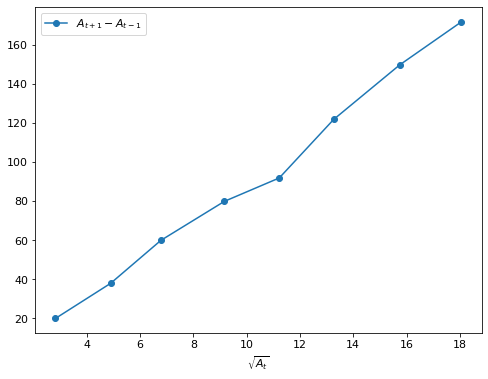

In [77]:
from math import sqrt
Datos5c["$\sqrt{A_t}$"] = Datos5c["$A_t$"].apply(sqrt)

def diferencia_A(t, columna):
    if t == 0:
        return None
    if t == (len(Datos5c.index)-1):
        return None
    return Datos5c[columna][t+1]-Datos5c["$A_t$"][t-1]
    
Datos5c["$A_{t+1}-A_{t-1}$"] = pd.DataFrame(map(lambda t: diferencia_A(t, "$A_t$"), list(Datos5c.index)))
#Datos5c['$A_{t+1}-A_{t-1}$']
Datos5c.plot(x="$\sqrt{A_t}$", y="$A_{t+1}-A_{t-1}$", marker="o")
#print(Datos5c[["$\sqrt{A_t}$","$A_{t+1}-A_{t-1}$"]].to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
 $\sqrt{A_t}$ &  $A_{t+1}-A_{t-1}$ \\
\midrule
        2.000 &                NaN \\
        2.828 &               20.0 \\
        4.899 &               38.0 \\
        6.782 &               60.0 \\
        9.165 &               80.0 \\
       11.225 &               92.0 \\
       13.266 &              122.0 \\
       15.748 &              150.0 \\
       18.055 &              172.0 \\
       20.494 &                NaN \\
\bottomrule
\end{tabular}

Para encontrar $K$ simplemente se toma la media del conjunto $\left\{\frac{A_{t+1}-A_{t-1}}{\sqrt{A_t}}:t=1,2,\ldots,8\right\}$.

In [78]:
from numpy import median,mean
K = median(list(map(lambda x,y: y/x,
           Datos5c["$\sqrt{A_t}$"][1:-1].to_numpy(),Datos5c["$A_{t+1}-A_{t-1}$"][1:-1].to_numpy()) ))
K

8.787616489366762

<AxesSubplot:xlabel='$\\sqrt{A_t}$'>

<AxesSubplot:xlabel='$t$'>

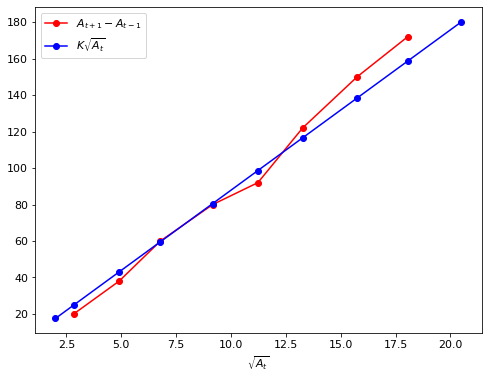

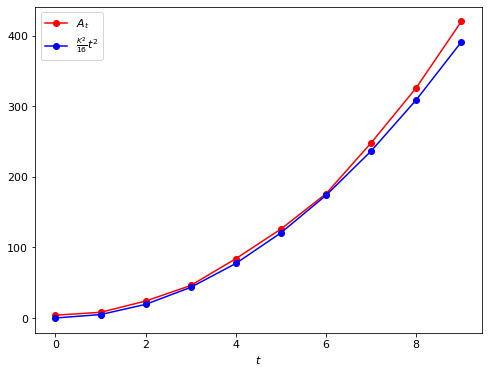

In [79]:
Datos5c["$K\sqrt{A_t}$"] = Datos5c["$\sqrt{A_t}$"].apply(lambda x: K*x)
Datos5c["$\\frac{K^2}{16}t^2$"] = Datos5c["$t$"].apply(lambda t: (K**2)/16*t**2)
Datos5c
display(Datos5c.plot(x="$\sqrt{A_t}$",
                     y=["$A_{t+1}-A_{t-1}$", "$K\sqrt{A_t}$"], marker="o", color=["r","b"]))
display(Datos5c.plot(x="$t$",
                     y=["$A_t$", "$\\frac{K^2}{16}t^2$"], marker="o", color=["r","b"]))
#print(Datos5c[["$t$", "$A_t$", "$\\frac{K^2}{16}t^2$"]].to_latex(index=False, escape=False))

\begin{tabular}{rrr}
\toprule
 $t$ &  $A_t$ &  $\frac{K^2}{16}t^2$ \\
\midrule
   0 &      4 &                0.000 \\
   1 &      8 &                4.826 \\
   2 &     24 &               19.306 \\
   3 &     46 &               43.437 \\
   4 &     84 &               77.222 \\
   5 &    126 &              120.660 \\
   6 &    176 &              173.750 \\
   7 &    248 &              236.493 \\
   8 &    326 &              308.889 \\
   9 &    420 &              390.937 \\
\bottomrule
\end{tabular}

En rojo los valores observados, y en azul la solución del modelo propuesto. Se puede ver que meramente tomar $\frac{K^2}{16}t^2$ como solución subestima todos los datos del experimento. Esto es de esperarse: La ecuación de diferencias se resuelve tomando $K$ como la media que mencionamos antes, quiere decir que no se estima ni se subestima tanto en cuánto el aumento. Pero la solución empieza en $0$ mientras que sabemos que el primer dato es con un valor de $4$ por lo que casi todos los datos se subestiman por $4$ al haber tomado una tasa de cambio media.

Si a la solución anterior le añadimos $4$ y le llamamos $\hat A_t$, se mejora la cercanía a los datos incluso en las diferencias relativas. Para esta solución usamos verde en la gráfica.

<AxesSubplot:xlabel='$\\sqrt{A_t}$'>

<AxesSubplot:xlabel='$t$'>

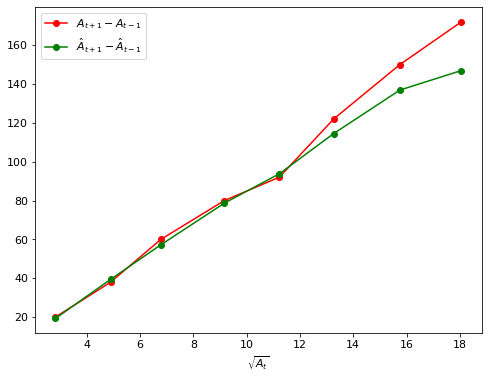

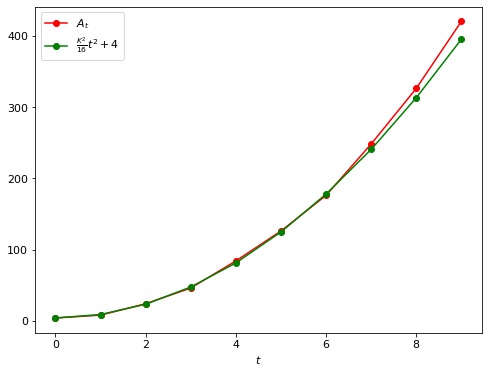

In [80]:
Datos5c["$\\frac{K^2}{16}t^2+4$"] = Datos5c["$\\frac{K^2}{16}t^2$"].apply(lambda x: x+4)
Datos5c["$\\hat A_{t+1}-\\hat A_{t-1}$"] = pd.DataFrame(map(
    lambda t: diferencia_A(t, "$\\frac{K^2}{16}t^2+4$"),
    list(Datos5c.index)))

display(Datos5c.plot(x="$\sqrt{A_t}$",
                     y=["$A_{t+1}-A_{t-1}$", "$\\hat A_{t+1}-\\hat A_{t-1}$"], marker="o", color=["r","g"]))
display(Datos5c.plot(x="$t$",
                     y=["$A_t$", "$\\frac{K^2}{16}t^2+4$"], marker="o", color=["r","g"]))
if False:
    print(Datos5c[["$t$", "$A_t$", "$\\frac{K^2}{16}t^2+4$",
               "$A_{t+1}-A_{t-1}$", "$\\hat A_{t+1}-\\hat A_{t-1}$"]].to_latex(index=False, escape=False))

\begin{tabular}{rrrrr}
\toprule
 $t$ &  $A_t$ &  $\frac{K^2}{16}t^2+4$ &  $A_{t+1}-A_{t-1}$ &  $\hat A_{t+1}-\hat A_{t-1}$ \\
\midrule
   0 &      4 &                  4.000 &                NaN &                          NaN \\
   1 &      8 &                  8.826 &               20.0 &                       19.306 \\
   2 &     24 &                 23.306 &               38.0 &                       39.437 \\
   3 &     46 &                 47.437 &               60.0 &                       57.222 \\
   4 &     84 &                 81.222 &               80.0 &                       78.660 \\
   5 &    126 &                124.660 &               92.0 &                       93.750 \\
   6 &    176 &                177.750 &              122.0 &                      114.493 \\
   7 &    248 &                240.493 &              150.0 &                      136.889 \\
   8 &    326 &                312.889 &              172.0 &                      146.937 \\
   9 &    420 &                394.937 &                NaN &                          NaN \\
\bottomrule
\end{tabular}

# Ejercicio 6: Eliminación de Penicilina

Se ingiere una pastilla de 500 miligramos de penicilina e ingresa inmediatamente al intestino. Cada cinco minutos después de la ingestión de la píldora.
- El 10 % de la penicilina en el intestino al comienzo del período se absorbe en el plasma.
- El riñón elimina el 15 % de la penicilina en el plasma al comienzo del período.

Sea $I_t$ la cantidad de penicilina en el intestino y $S_t$ la cantidad de penicilina en el plasma al final
del período de cinco minutos después de la ingestión de la píldora, ambos en miligramos.

## Condiciones iniciales

$$I_0 = 500,$$
$$S_0 = 0.$$

## Cambio de penicilina por periodo de tiempo

Con $0$ penicilina ingerida entre periodos, la penicilina agregada al intestino es $0$. Pero se elimina $10\%$ por el plasma.
$$I_{t+1}-I_t = -0.10 I_t.$$

En cambio en el plasma, se agregan $10\%$ del intestino, y el riñon elimina $15\%$ de la plasma.
$$S_{t+1}-S_t = 0.10 I_t -0.15 S_t.$$

# Ejercicio 7.

Se remplaza la notación del sistema de a) y de b) por la de los siguientes respectivos sistemas equivalentes.
$$A_0 = 0,$$
$$A_{t+1} = 100+0.2 A_t.$$
$$B_0 = 0,$$
$$B_{t+1} = 10 -0.1 B_t.$$

## 1. Dar los términos $0,1,2,3,4$ para cada sistema

In [81]:
A = lambda a: 100+0.2*a
B = lambda b: 10-0.1*b

def recur(f, f_0, t):
    seq = list()
    for t in range(t):
        f_0 = f(f_0)
        seq.append(f_0)
    return seq

Datos7 = pd.DataFrame(map(lambda t,a,b: (t,a,b),
                 list(range(5)),recur(A, 0, 5),recur(B, 0, 5)),
             columns = ["$t$", "$A_t$", "$B_t$"])
#print(Datos7.to_latex(index=False, escape=False))

\begin{tabular}{rrr}
\toprule
 $t$ &  $A_t$ &  $B_t$ \\
\midrule
   0 & 100.00 & 10.000 \\
   1 & 120.00 &  9.000 \\
   2 & 124.00 &  9.100 \\
   3 & 124.80 &  9.090 \\
   4 & 124.96 &  9.091 \\
\bottomrule
\end{tabular}

## 2. Encontrar el valor de equilibrio para cada sistema

En un sistema

$$W_{t+1} = w + k W_t,$$

el punto de equilibrio $W$ es tal que $W = W_{t+1} = W_t$ es decir

$$W = w + kW.$$

Cuando $k\neq 1$,

$$W = \frac{w}{1-k}.$$

(Usualmente se usa $K$ en lugar de $k$.)

Sustituyendo los valores del sistema de a) y b) sus puntos de equilibrio son respectivamente

$$A = \frac{100}{0.8} = 125,$$

$$B = \frac{10}{1.1} = 9.\overline{09}.$$

## 3. Escribir ecuación solución para cada sistema

Al sistema 

$$W_{t+1} = w + k W_t,$$

se le resta la ecuación

$W = w + kW$ para obtener
$$W_{t+1}-W = k W_t-kW.$$

Se denota a $W_t-W$ como $D_t$ y la ecuación anterior se reduce a una cuya solución ya conocemos.

$$D_{t+1} = k D_t,$$

$$D_{t+1}-D_t = (1-k) D_t.$$

Con solución

$$D_t = k^t D_0.$$

O escrito respecto de $W_t$

$$W_t = W+ k^t (W_0-W).$$

Sustituyendo los valores para el sistema a) y b) tenemos respectivamente las ecuaciones de solución

$$A_t = 125- 0.2^t \cdot 125,$$

$$B_t = 9.\overline{09}- (-0.1)^t \cdot9.\overline{09}.$$

## 4. Calcular $A_{100}$ y $B_{100}$

$$A_{100} =125.0,$$
$$B_{100} =9.090909090909092.$$

## 5. Tiempo de reducción a la mitad de los sistemas

Si $t$ es tal que $W_{t+t_0}-0.5 W_{t_0}=0$, $t$ es el tiempo de reducción a la mitad para el sistema de $W_t$ desde el tiempo $t_0$.
La ecuación

$$W_{t+t_0}-0.5 W_{t_0}=0$$

se puede reescribir con la solución del sistema como

$$W+ k^{t+t_0} (W_0-W) -0.5\left[W+ k^{t_0} (W_0-W)\right] = 0,$$
$$0.5W+(k^{t+t_0}-0.5k^{t_0}) (W_0-W)= 0,$$

$$0.5W+k^{t_0}(k^{t}-0.5) (W_0-W)= 0.$$

De donde si $W_0\neq W$ y $k> 0$

$$2k^{t} = -\frac{W}{k^{t_0}(W_0-W)}+1,$$

$$\log(2)+t \log(k) = \log\left[-\frac{W}{k^{t_0}(W_0-W)}+1\right],$$

$$t= \frac{\log\left[-\frac{W}{k^{t_0}(W_0-W)}+1\right]-\log{2}}{\log{k}}.$$

Si alguno de los logaritmos no está definido entonces no hay tiempo de reducción a la mitad para el sistema desde el tiempo $t_0$. Solo está definido $t$ cuando

$$1> \frac{W}{k^{t_0}(W_0-W)},$$
$$k^{t_0}(W_0-W)> W,$$
$$W_0> \left(k^{-t_0}+1\right)W.$$

Para el sistema a) no hay tiempo de reducción a la mitad porque $A_0=0$ pero el lado derecho de la condición anterior es positivo pues $k=0.2$:

$$0> \left(0.2^{-t_0}+1\right)125$$

siempre es falso.

Para el sistema b) falla la condición desde antes porque $k<0$.

# Ejercicio 8.

El modelo original tenía una ecuación dinámica para la cantidad de químicos $W_t$ en el lago en kg, en el día $t$:
$$W_{t+1}-W_t = 100-5\times 10^{-4} W_t.$$
Donde $5\times 10^{-4}$ era por la proporcionalidad de la salida de químicos con el flujo de agua a través del lago y la concentración de químicos de ese día. Mantenemos esta constante para la salida de químicos y se siguen virtiendo 100 kg de químicos al lago. Pero ahora imitando al modelo de la eliminación de penicilina, separamos al lago en una proximidad de la fábrica, y "el resto del lago" donde la concentración de químicos se vuelve uniforme. 

Suponemos que solo de entre los químicos en el resto del lago es de dónde los químicos salen del lago. Sean $P_t$ los químicos diluidos en la proximidad de la fábrica, y $R_t$ los químicos en el resto del lago al día; ambos en kilogramos. Entonces salen $5\times 10^{-4} R_t$ kg de químicos del lago al día.

Es supuesto del ejercicio que cada 10 días 100kg de químico se mezclan uniformemente en la totalidad del lago. En nuestro modelo esto corresponde a que salen 10kg de la proximidad de la fabrica hacía el resto del lago al día. 

Entonces en un día, en la proximidad del lago entran 100kg de la fabrica, y salen 10kg a diluirse al resto del lago.
$$P_{t+1}-P_t = -10+100 = 90.$$

En el resto del lago en un día, se añaden 10kg de la proximidad de la fabrica que se diluyen uniformemente; y así 100kg en 10 días son los que se diluyen en el lago uniformemente. Pero también sale una proporción de los químicos presentes ese día por el flujo del agua, como hemos dicho $5\times 10^{-4} R_t$.
$$R_{t+1}-R_t = 10-5\times 10^{-4} R_t.$$

Estas ecuaciones son independientes una de la otra: Cada día 90kg más se acumulan en una proximidad de la fábrica mientras que el resto del lago está siendo vertido con solo 10kg de químicos al día, expulsando la misma cantidad que en el modelo original.

Si se ignora el requísito de que solo 100kg cada 10 días se diluyan en el lago, podemos hacer proporcional la cantidad de químicos que se diluye al resto del lago con la cantidad de químicos en la proximidad del lago. Digamos que $10\%$ del contenido químico en la proximidad del lago es diluido en el resto del lago cada día. Entonces el sistema sería

$$P_{t+1}-P_t = 100-0.1P_t,$$
$$R_{t+1}-R_t = 0.1P_t -5\times 10^{-4} R_t.$$

# Ejercicio 9.

Sea $P_t$ es la población de codornices en el año $t$.
La descripción del fenómeno nos dice:

$$P_{t+1} = -1000+1.2P_t.$$

El punto de equilibrio $E$ si existe cumple que $E=P_{t+1}=P_{t}$ o

$$E = -1000+1.2E,$$
$$E = \frac{1000}{0.2} = 5000.$$

Como resolvimos en el ejercicio 7.3, la solución al sistema es entonces

$$P_t = 5000+1.2^t\cdot(P_0-5000).$$

a) Si $P_0=5000$ la población se mantiene constante, en 5 años se tiene la misma cantidad de población.

b) Si $P_0=6000$, en 5 años se tiene $P_5= 5000+1.2^5\cdot 1000=7488.32$ de población o $7488$ redondeando.

c) Si $P_0=4000$, disminuye la población; en 5 años hay $P_5=5000-1.2^t\cdot 1000=2511$ aves (redondeando).